In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ngsolve import *
from ngsolve.webgui import Draw

from pathlib import Path
import os
import sys
sys.path.append(str(Path(os.getcwd()).parent / "src"))
from scipy.signal import find_peaks, peak_widths

In [2]:
from ngsolve.webgui import Draw
import utils
import double_fluid_gel_fem
import importlib

importlib.reload(double_fluid_gel_fem)
importlib.reload(utils)

<module 'utils' from '/Users/yuli/Documents/Code/Cleavage/src/utils.py'>

In [3]:
tanh = lambda arg: (exp(arg) - exp(-arg))/(exp(arg)+exp(-arg)) 
left_edge = 0.5 - 0.06
right_edge = 0.5 + 0.06
left_transition = 0.5 * (tanh((x - left_edge)/0.01))
right_transition = 0.5 * (tanh((right_edge - x)/0.01))

bottom_transition = 0.5 * (tanh((y - 0.1)/0.1))
top_transition = 0.5 * (tanh((0.9 - y)/0.1))
source =1*(left_transition + right_transition) *(top_transition + bottom_transition)

def add_cbar(ax, im, vmin, vmax, label):
    cbar = plt.colorbar(im, ax=ax, location='bottom', pad=0.1)
    cbar.set_ticks([vmin, vmax])
    cbar.set_ticklabels([f'{vmin:.2g}', f'{vmax:.2g}'])
    cbar.set_label(label, fontsize=20)
    return cbar

In [4]:
T = 20
tau = 0.05
beta_prod = 1
beta2 = 1
beta1 = beta_prod/beta2
eta = 1
kappa = 1e-3
k_actin = 0.1
chi0 = 0.05 
chi1 = 0.2

param_sets = [
    2.1, 2, 1.95, 1.9, 1.85, 1.8, 1.75, 1.7, 1.65, 1.6, 1.55, 1.5 
]

sim_results = [] 
for (i, Qsq) in enumerate(param_sets):
    print(f"Running simulation {i+1} with Qsq={Qsq}")

    sim = double_fluid_gel_fem.DoubleActinGel2D(
        width=1, height=1, maxh=0.03,
        gamma=eta, eta_1=eta, eta_2=0,
        k=1, k_actin=k_actin,
        D=1e-4, kappa=kappa,
        beta1=beta1, beta2=beta2,
        chi0=chi0, chi1=chi1,
        Qsq=-1+Qsq*source,
        rho0=1*source + 0.,
        rho0_actin=1*(1-source) + 0)

    sim.density.Set(1*source)
    sim.density2.Set((1-source))

    sim.simulate(
        tend=T,
        tau=tau,
        save_interval=int(0.5/tau)  # save once a second
    )

    filename = f'sim_data/caRhoA_{i+1}'
    n_samples = 100
    data = sim.export_to_npy(filename, n_samples=n_samples)
    sim_results.append(data) 

Running simulation 1 with Qsq=2.1


  6%|▌         | 24/400 [00:00<00:03, 106.38it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:03<00:00, 127.66it/s]


Running simulation 2 with Qsq=2


 10%|█         | 40/400 [00:00<00:01, 181.49it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 189.10it/s]


Running simulation 3 with Qsq=1.95


 14%|█▎        | 54/400 [00:00<00:01, 174.71it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 173.96it/s]


Running simulation 4 with Qsq=1.9


  9%|▉         | 37/400 [00:00<00:02, 180.92it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 176.33it/s]


Running simulation 5 with Qsq=1.85


  8%|▊         | 33/400 [00:00<00:02, 160.02it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 166.46it/s]


Running simulation 6 with Qsq=1.8


 12%|█▏        | 48/400 [00:00<00:02, 164.79it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 172.37it/s]


Running simulation 7 with Qsq=1.75


  4%|▍         | 18/400 [00:00<00:02, 172.74it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 174.79it/s]


Running simulation 8 with Qsq=1.7


 14%|█▍        | 58/400 [00:00<00:01, 182.43it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 189.58it/s]


Running simulation 9 with Qsq=1.65


  7%|▋         | 28/400 [00:00<00:02, 133.00it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 143.32it/s]


Running simulation 10 with Qsq=1.6


  8%|▊         | 31/400 [00:00<00:02, 154.06it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 162.16it/s]


Running simulation 11 with Qsq=1.55


 14%|█▍        | 56/400 [00:00<00:01, 179.58it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 179.66it/s]


Running simulation 12 with Qsq=1.5


 10%|▉         | 38/400 [00:00<00:01, 186.67it/s]

craete bilinearformapplication


100%|██████████| 400/400 [00:02<00:00, 151.44it/s]


In [5]:
def plot_kymo(data, figname, min_max_dict=None):
    _, axes = plt.subplots(1, 4, figsize=(16, 5), sharex=True, sharey=True)
    start_index = 0
    end_index = int(20/0.5)
    data = data[start_index:end_index]
    vx = data[:, 24, :, 2]
    dxvx = np.gradient(vx, axis=1)/(1/n_samples)
    density = data[:, 24, :, 1] + data[:, 24, :, 0]
    
    # Define default vmin/vmax values
    default_vmin_vmax = {
        'density': (np.min(density), np.max(density)),
        'vx': (np.min(vx), np.max(vx)),
        'compression': (-np.max(dxvx), np.max(dxvx)),
        'Q_yy': (np.min(data[:, 24, :, -2]), -np.min(data[:, 24, :, -2]))
    }
    
    # Use min_max_dict values if provided, otherwise use defaults
    if min_max_dict is None:
        min_max_dict = {}
    
    density_vmin, density_vmax = min_max_dict.get('density', default_vmin_vmax['density'])
    vx_vmin, vx_vmax = min_max_dict.get('vx', default_vmin_vmax['vx'])
    compression_vmin, compression_vmax = min_max_dict.get('compression', default_vmin_vmax['compression'])
    qyy_vmin, qyy_vmax = min_max_dict.get('Q_yy', default_vmin_vmax['Q_yy'])
    
    fields = [
        (density, r'$\phi + \psi$', 'inferno', density_vmin, density_vmax),
        (vx, r'$v_x$', 'RdBu_r', vx_vmin, vx_vmax),
        (-dxvx, r'$ - \partial_x v_x$', 'RdBu_r', compression_vmin, compression_vmax),
        (-data[:, 24, :, -2], r'$Q_{yy}$', 'RdBu_r', qyy_vmin, qyy_vmax)
    ]
    
    for ax, (field, title, cmap, vmin, vmax) in zip(axes, fields):
        im = ax.imshow(field, aspect='auto', interpolation='none',
                      origin='upper', cmap=cmap, extent=(0, 1, T/2, 0), vmin=vmin, vmax=vmax)
        add_cbar(ax, im, vmin, vmax, title)
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    axes[0].set_ylabel('Time')
    plt.tight_layout()
    plt.savefig(f'../figures/{figname}.svg', dpi=500)
    plt.show()

Plotting simulation 1 with Qsq=2.1


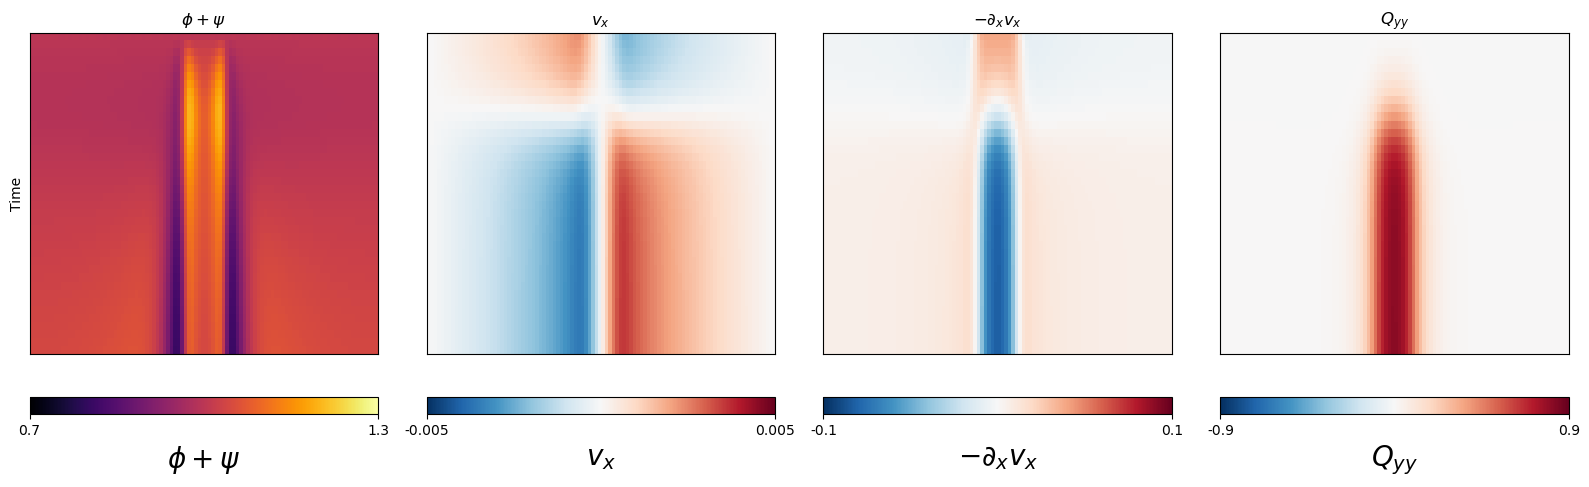

Plotting simulation 2 with Qsq=2


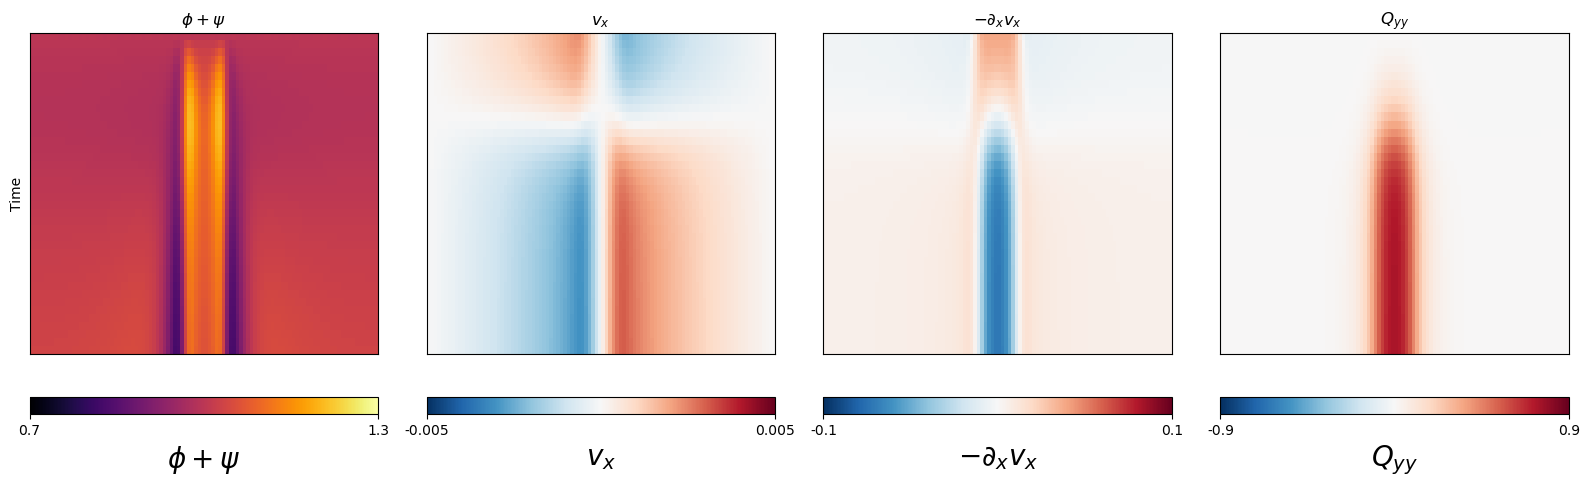

Plotting simulation 3 with Qsq=1.95


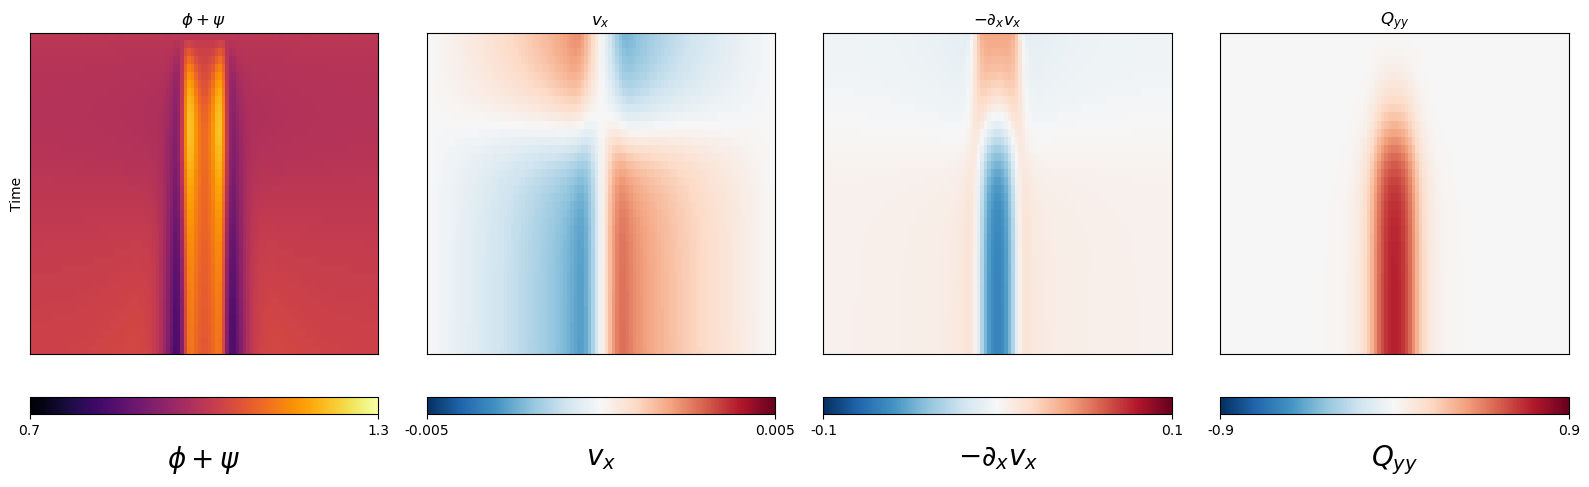

Plotting simulation 4 with Qsq=1.9


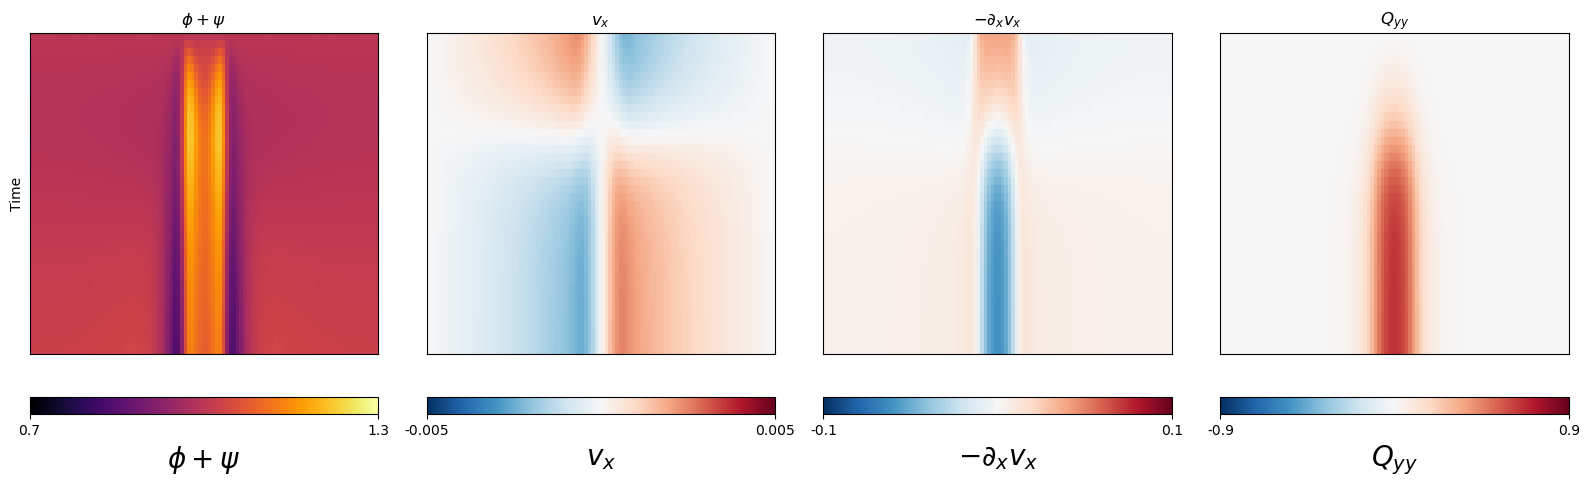

Plotting simulation 5 with Qsq=1.85


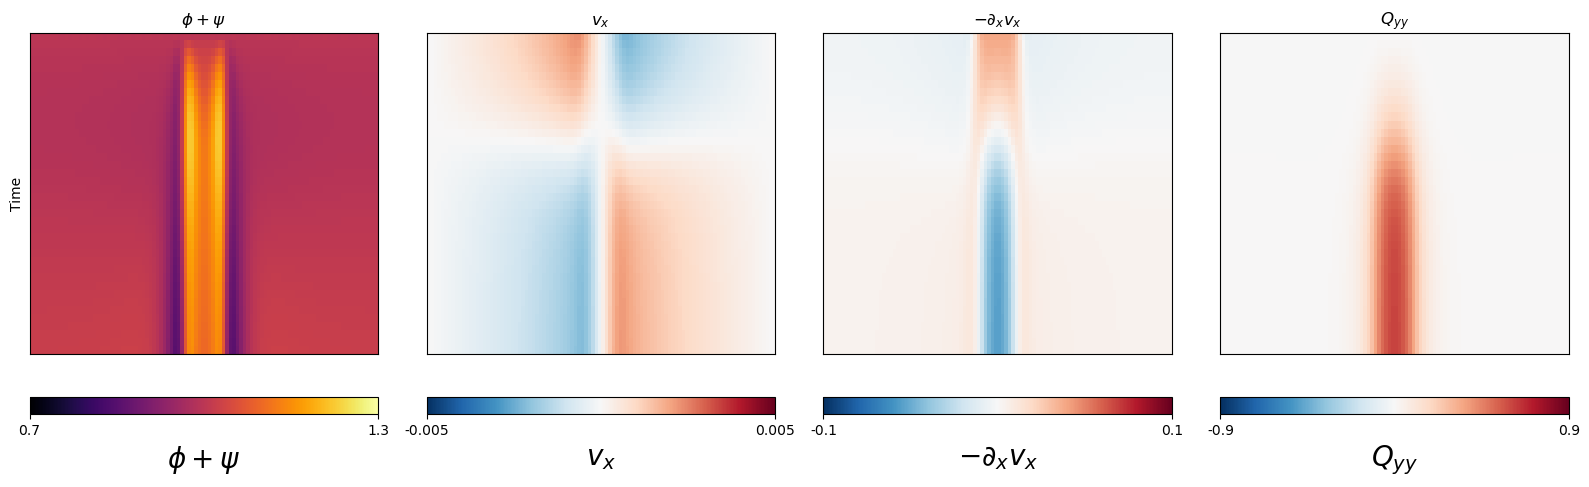

Plotting simulation 6 with Qsq=1.8


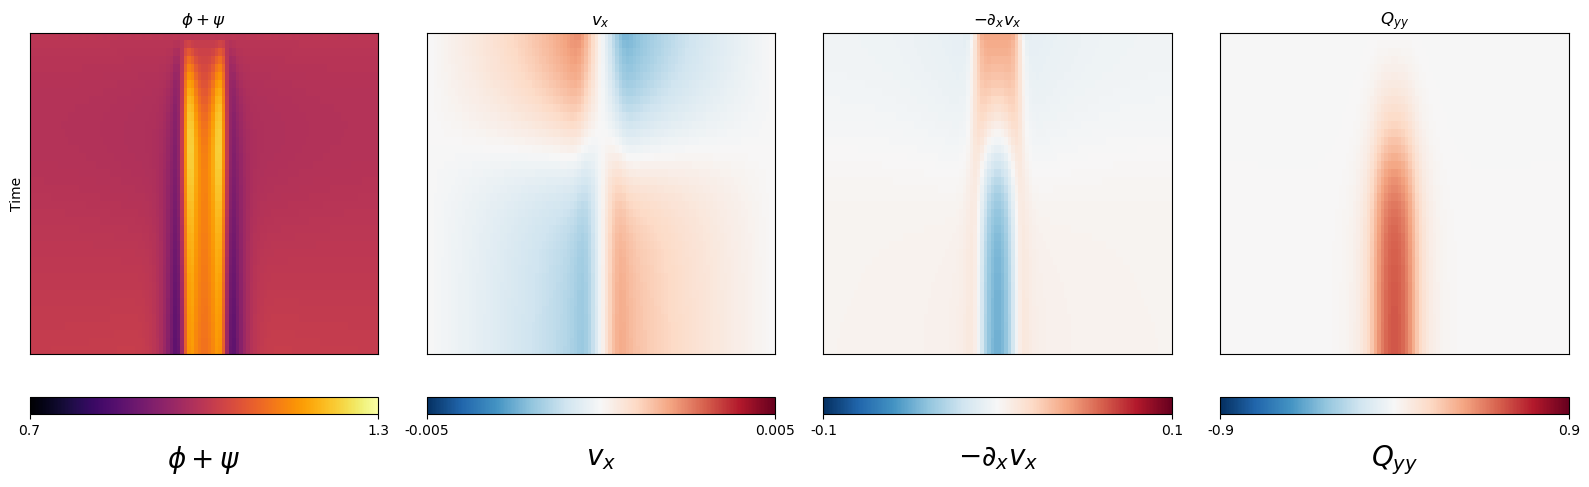

Plotting simulation 7 with Qsq=1.75


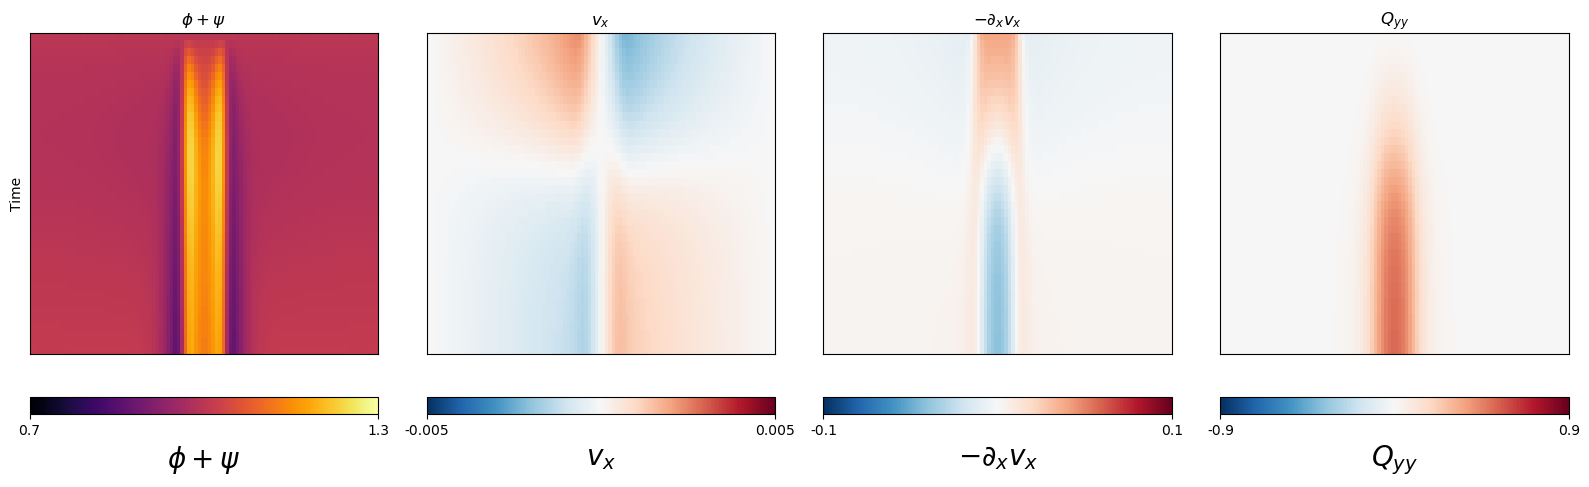

Plotting simulation 8 with Qsq=1.7


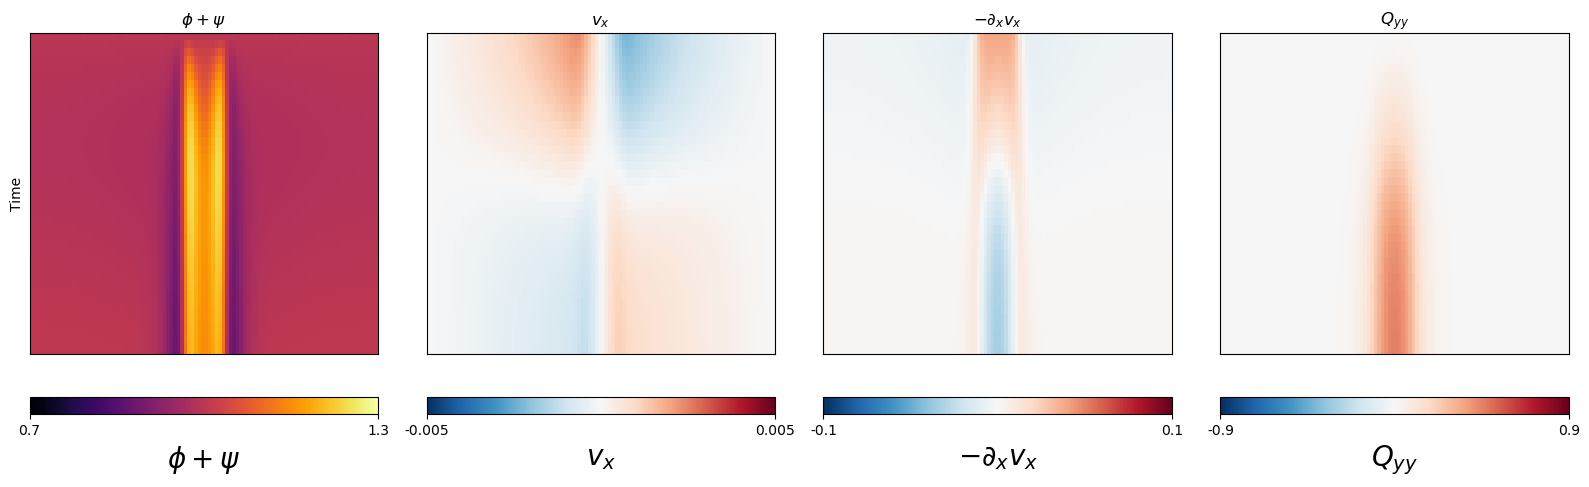

Plotting simulation 9 with Qsq=1.65


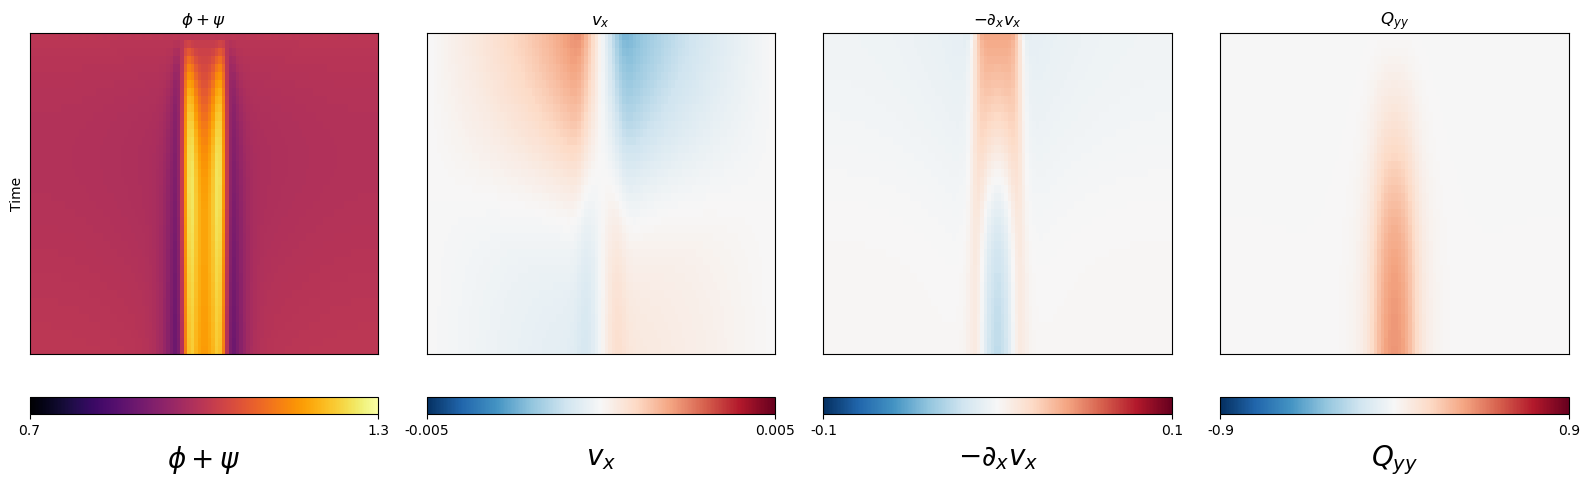

Plotting simulation 10 with Qsq=1.6


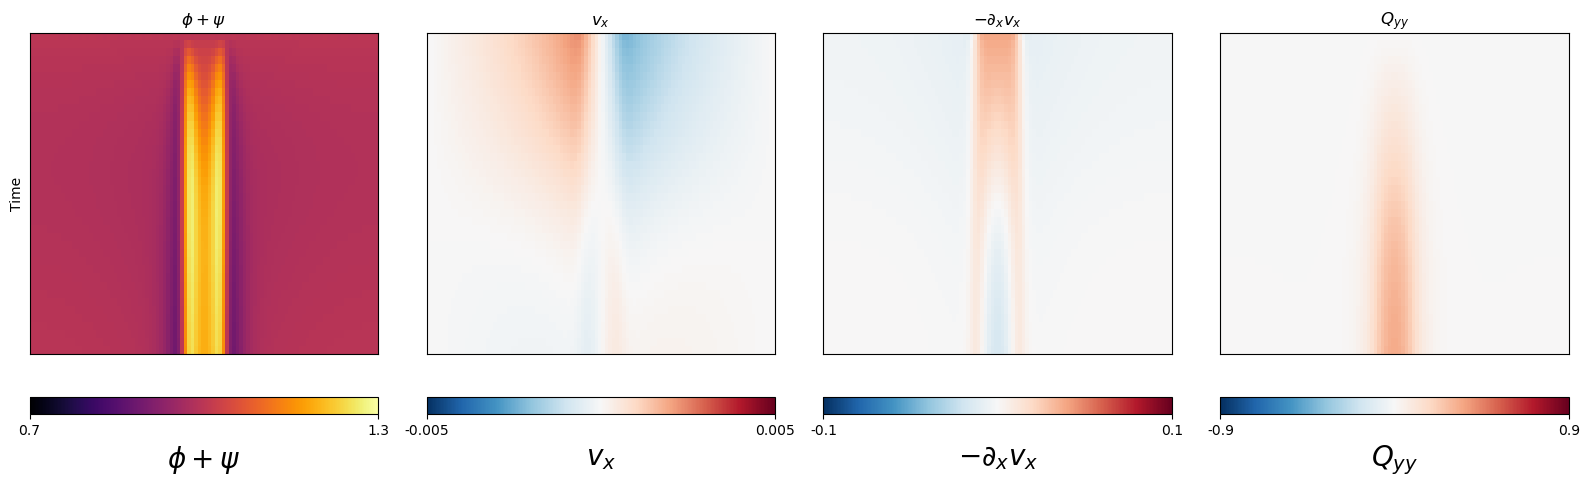

Plotting simulation 11 with Qsq=1.55


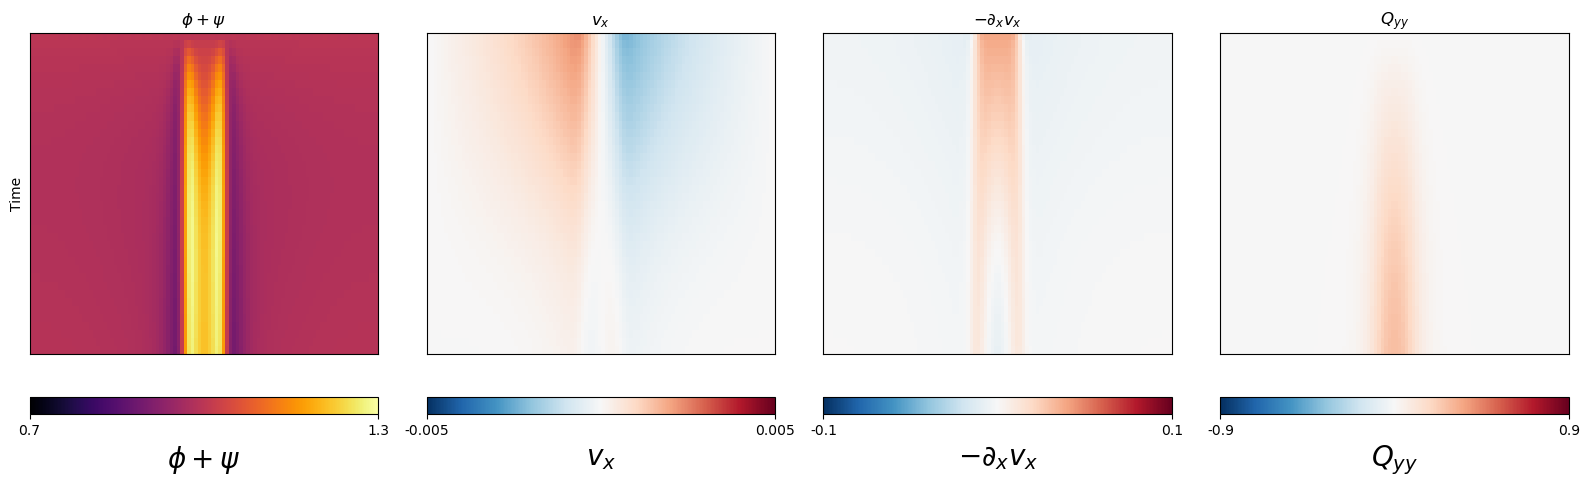

Plotting simulation 12 with Qsq=1.5


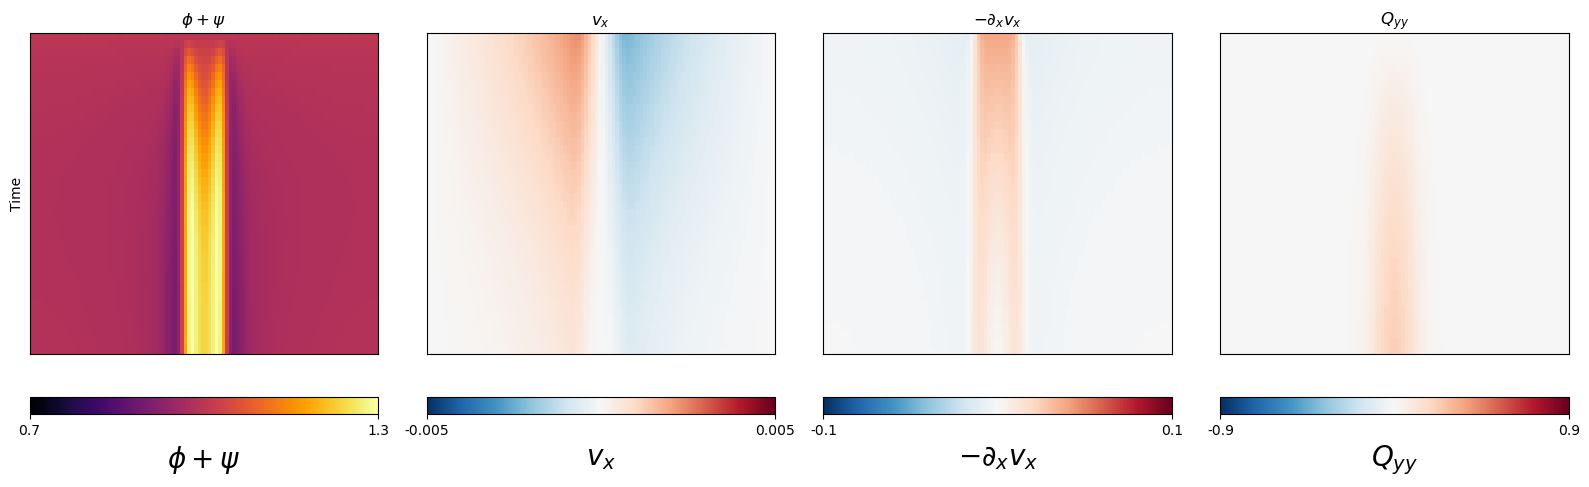

In [6]:
min_max_dict = { 
    'density': [0.7, 1.3], 
    'vx': [-0.005, 0.005],
    'compression': [-0.1, 0.1],   
    'Q_yy': [-0.9, 0.9], 
}

for (i, Qsq) in enumerate(param_sets):
    print(f"Plotting simulation {i+1} with Qsq={Qsq}")
    plot_kymo(sim_results[i], f'caRhoA_kymo_Qsq_{Qsq}', min_max_dict=min_max_dict)

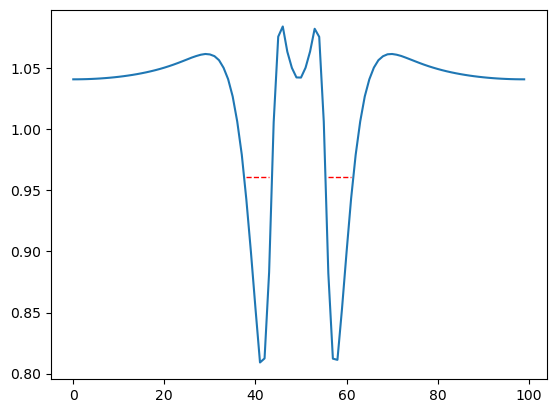

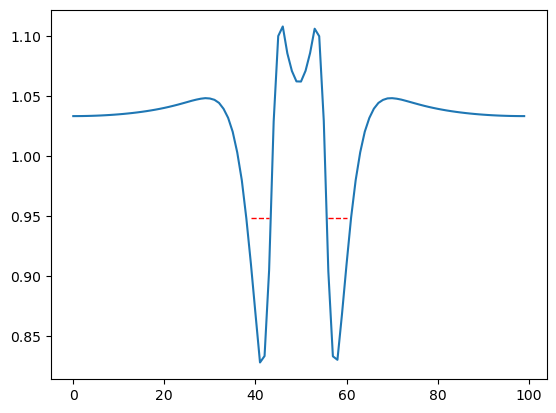

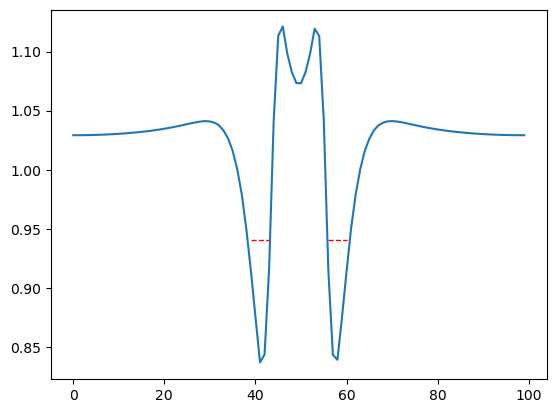

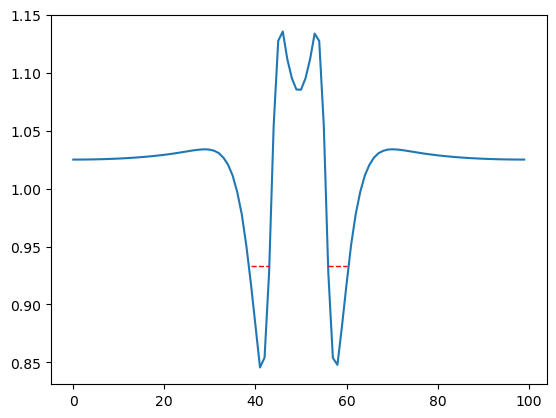

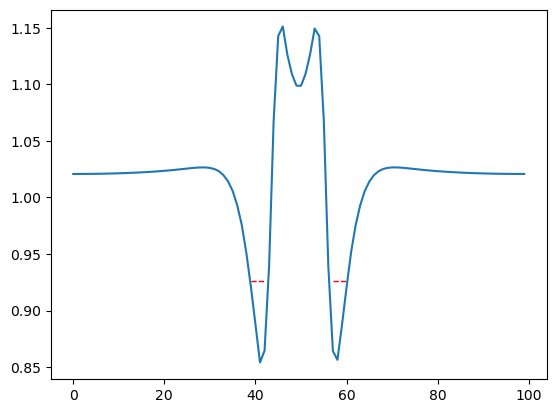

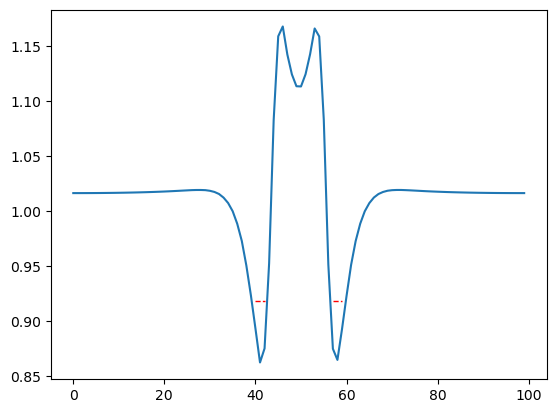

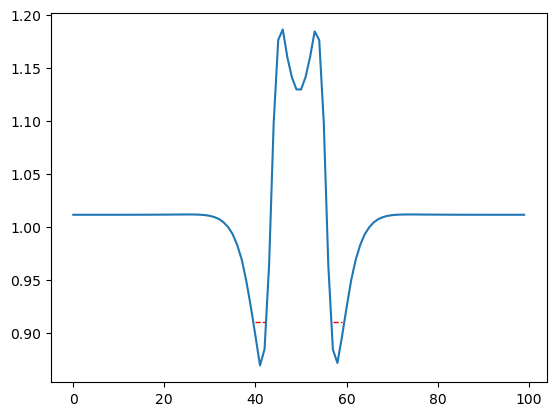

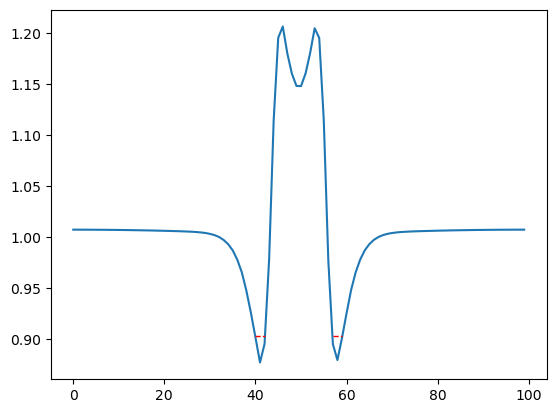

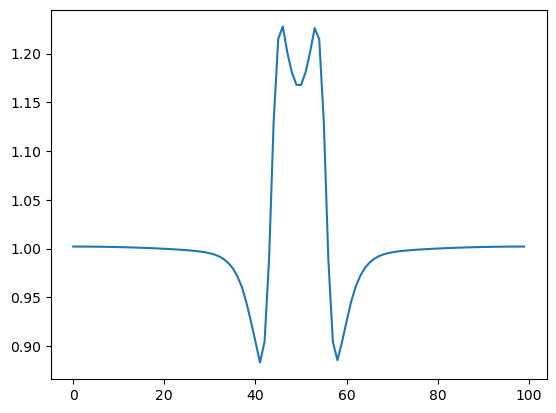

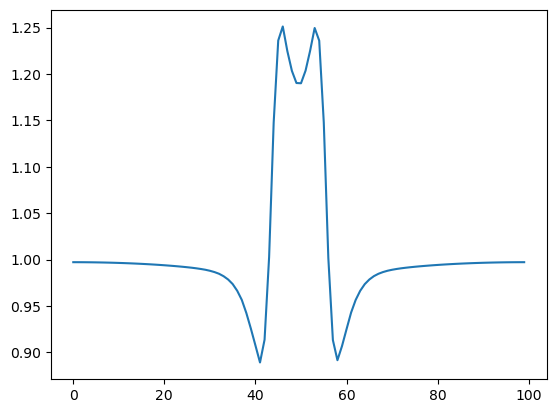

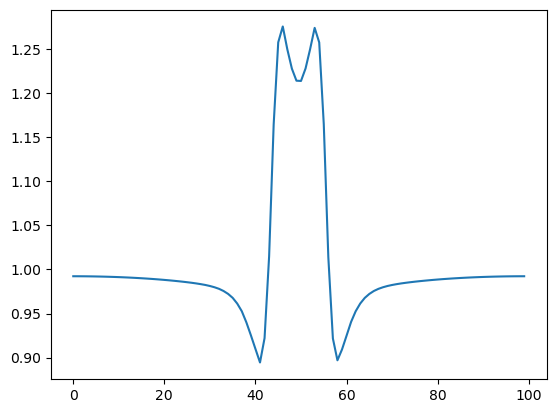

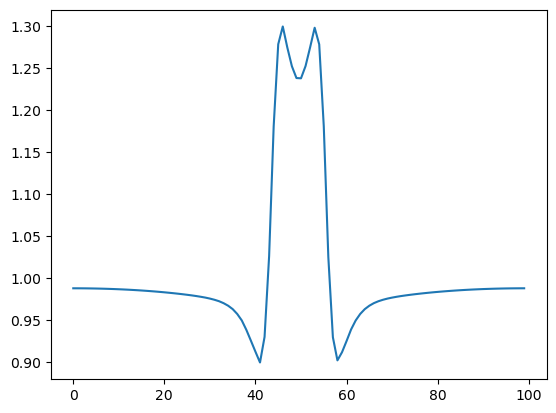

In [7]:
densities = [(sim_results[i][-1, 24, :, 1] + sim_results[i][-1, 24, :, 0]) for i in range(len(param_sets))]

def compute_depletion_widths(density):
    threshold = np.min(density) + (np.max(density[30:40])- np.min(density) - 0.1)
    selection = density < threshold
    width = np.sum(selection)/2
    
    plt.plot(density)
    threshold_line = np.full(len(density), threshold)
    threshold_masked = np.ma.masked_where(~selection, threshold_line)
    
    plt.plot(threshold_masked, 'r--', linewidth=1)
    plt.show() 
    
    return width

widths = np.array([compute_depletion_widths(density) for density in densities])
velocities = np.array([np.max(np.abs(sim_results[i][-1, 24, :, 2])) for i in range(len(param_sets))])

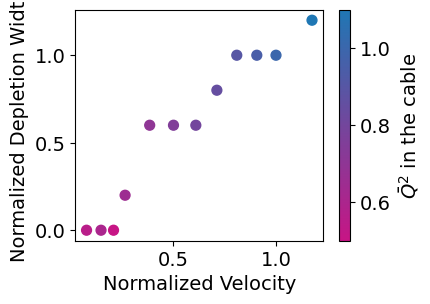

In [10]:
plt.rcParams.update({'font.size': 14})


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def two_color_colormap(color1, color2, name="custom_cmap"):
    """
    Create a linear colormap between two colors.

    Parameters:
        color1 (str or tuple): First color (e.g., "blue" or (0.1, 0.2, 0.5)).
        color2 (str or tuple): Second color (e.g., "red" or (0.8, 0.2, 0.3)).
        name (str): Name of the colormap.

    Returns:
        LinearSegmentedColormap: A matplotlib colormap object.
    """
    return LinearSegmentedColormap.from_list(name, [color1, color2])

# Example usage
tabblue_mediumvioletred_cmap = two_color_colormap("mediumvioletred", "tab:blue")

plt.figure(figsize=(4, 3))
plt.scatter(velocities/velocities[1], widths/widths[1], c=(np.array(param_sets)-1), s=50, cmap=tabblue_mediumvioletred_cmap)
plt.colorbar(label=r'$\bar{Q}^2$ in the cable')
plt.xlabel('Normalized Velocity')
plt.ylabel('Normalized Depletion Width')
plt.savefig('../figures/velocity_depletion_width.svg')
plt.show()

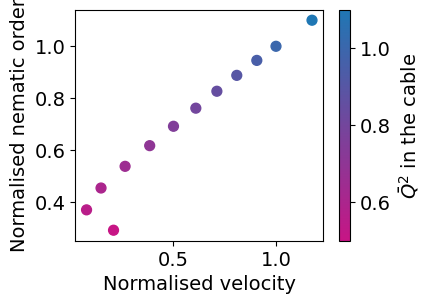

In [11]:
nematic = [np.max(np.abs(sim_results[i][-1, 24, :, -2])) for i in range(len(param_sets))]

plt.figure(figsize=(4, 3))
plt.scatter(velocities/velocities[1], nematic/nematic[1], c=(np.array(param_sets)-1), s=50, cmap=tabblue_mediumvioletred_cmap)
plt.colorbar(label=r'$\bar{Q}^2$ in the cable')
plt.ylabel('Normalised nematic order')
plt.xlabel('Normalised velocity')
plt.savefig('../figures/velocity_nematic_order.svg')
plt.show() 

In [12]:
np.savez('sim_data/caRhoA.npz', velocities=velocities/velocities[1], widths=widths/widths[1], param_sets=param_sets[1:], nematic=nematic/velocities[1])

In [74]:
def plot_frame(n_samples, rho, div_v, vx, vy, nx, ny, Qxx, filename, stride=3, min_max_dict=None):
    X = np.linspace(0, 1, n_samples)
    Y = np.linspace(0, 1, n_samples)
    X, Y = np.meshgrid(X, Y)
    
    # Calculate default values
    mag = np.sqrt(vx**2 + vy**2)
    max_div_v = np.max(np.abs(div_v))
    qxx_max = np.max(np.abs(Qxx))
    
    # Define default vmin/vmax values
    default_vmin_vmax = {
        'density': (np.min(rho), np.max(rho)),
        'velocity': (np.min(mag), np.max(mag)),
        'compression': (-max_div_v, max_div_v),
        'Q_yy': (-qxx_max, qxx_max)
    }
    
    # Use min_max_dict values if provided, otherwise use defaults
    if min_max_dict is None:
        min_max_dict = {}
    
    density_vmin, density_vmax = min_max_dict.get('density', default_vmin_vmax['density'])
    velocity_vmin, velocity_vmax = min_max_dict.get('velocity', default_vmin_vmax['velocity'])
    compression_vmin, compression_vmax = min_max_dict.get('compression', default_vmin_vmax['compression'])
    qyy_vmin, qyy_vmax = min_max_dict.get('Q_yy', default_vmin_vmax['Q_yy'])
    
    # Plot the contour for rho_vals
    fig, axes = plt.subplots(1, 4, figsize=(17, 5))
    
    # Density plot
    im0 = axes[0].imshow(rho, aspect='auto', interpolation='none',
                        origin='upper', cmap='inferno', extent=(0, 1, 1, 0),
                        vmin=density_vmin, vmax=density_vmax)
    add_cbar(axes[0], im0, density_vmin, density_vmax, r'$\phi + \psi$')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    # Velocity plot
    im2 = axes[1].pcolor(X, Y, mag, cmap='Reds', vmin=velocity_vmin, vmax=velocity_vmax)
    add_cbar(axes[1], im2, velocity_vmin, velocity_vmax, r'$v$')
    axes[1].quiver(X[2::stride, 2::stride], Y[2::stride, 2::stride],
                  (vx/mag)[2::stride, 2::stride], (vy/mag)[2::stride, 2::stride],
                  scale=15,
                  width=0.011, pivot='mid', headwidth=3, headlength=3, headaxislength=3,
                  color='black')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    
    # Compression rate plot
    im1 = axes[2].pcolor(X, Y, div_v, cmap='RdBu_r', vmin=compression_vmin, vmax=compression_vmax)
    add_cbar(axes[2], im1, compression_vmin, compression_vmax, r'$\nabla \cdot v$')
    axes[2].set_xticks([])
    axes[2].set_yticks([])
    
    # Nematic order plot
    mag_n = np.sqrt(nx**2 + ny**2)
    im3 = axes[3].pcolor(X, Y, -Qxx, cmap='RdBu_r', vmin=qyy_vmin, vmax=qyy_vmax)
    add_cbar(axes[3], im3, qyy_vmin, qyy_vmax, r'$Q_{yy}$')
    axes[3].quiver(X[2::stride, 2::stride], Y[2::stride, 2::stride],
                  (nx/mag_n)[2::stride, 2::stride], (ny/mag_n)[2::stride, 2::stride],
                  color='black', scale=20, width=0.010, pivot='mid', 
                  headwidth=0, headlength=0, headaxislength=0)
    axes[3].set_xticks([])
    axes[3].set_yticks([])
    
    plt.tight_layout()
    plt.savefig(filename, dpi=400)
    plt.show()


/var/folders/5n/0rvnm9350db7gk5vdnj3tn6h0000gn/T/ipykernel_981/2235463988.py:43: RuntimeWarning: invalid value encountered in divide
  (vx/mag)[2::stride, 2::stride], (vy/mag)[2::stride, 2::stride],


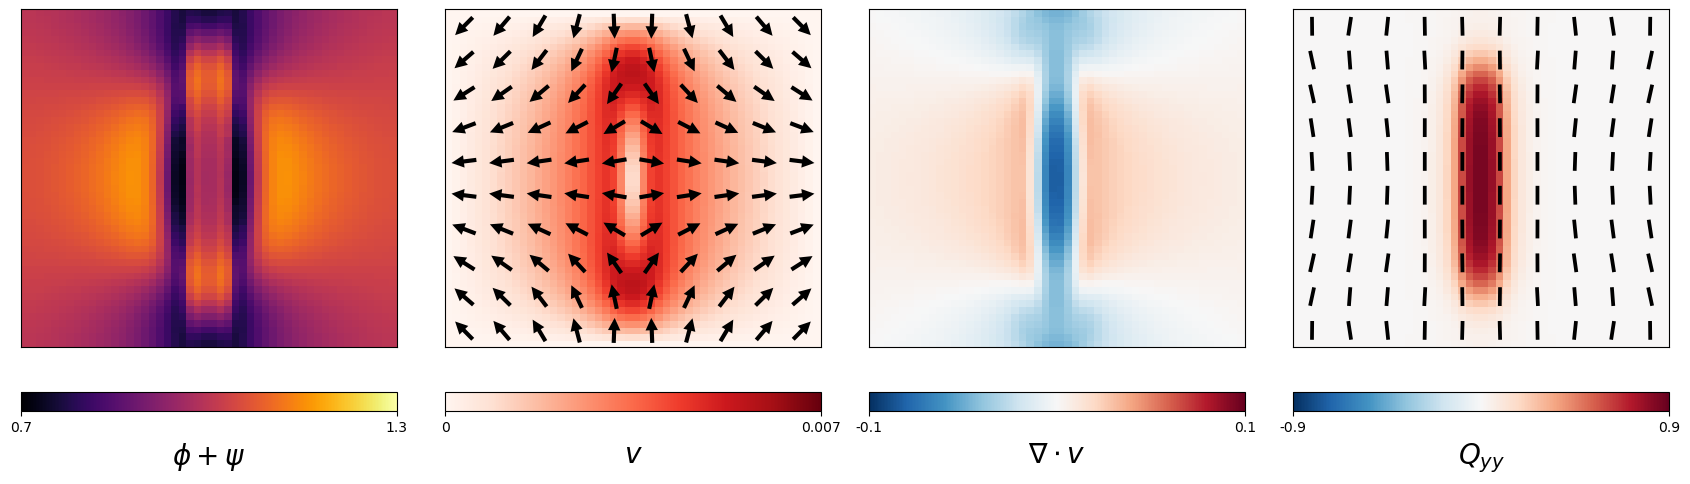

/var/folders/5n/0rvnm9350db7gk5vdnj3tn6h0000gn/T/ipykernel_981/2235463988.py:43: RuntimeWarning: invalid value encountered in divide
  (vx/mag)[2::stride, 2::stride], (vy/mag)[2::stride, 2::stride],


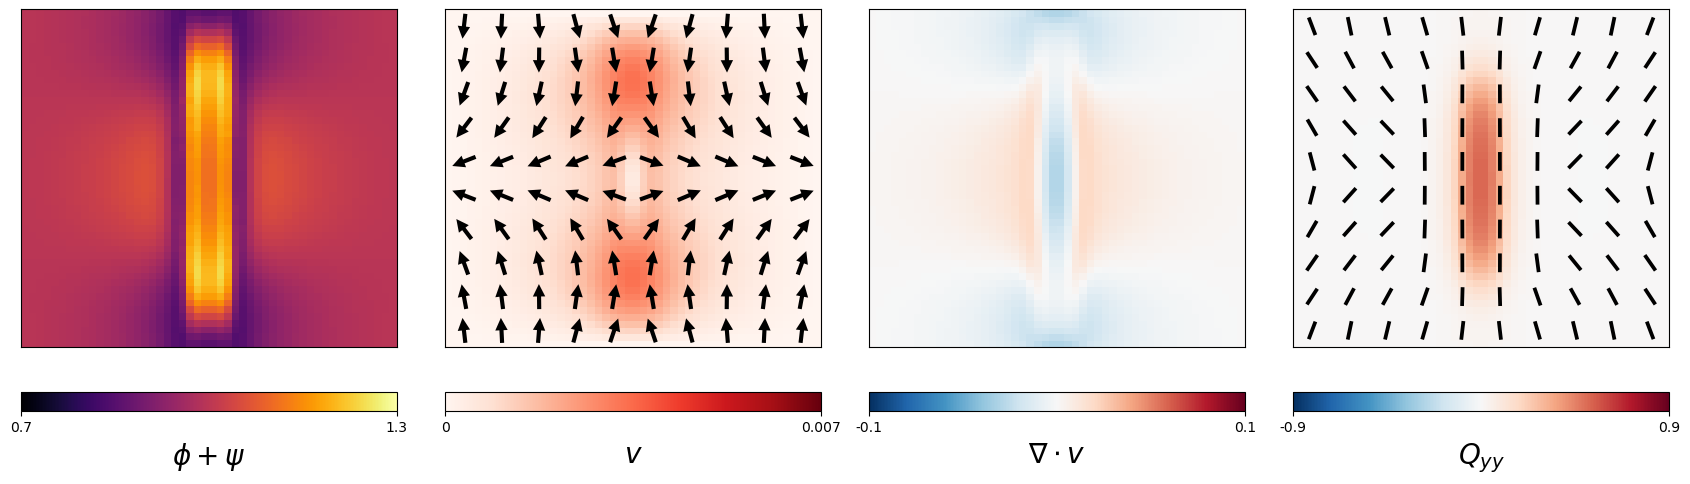

In [75]:
t = -1

min_max_dict = { 
    'density': [0.7, 1.3], 
    'velocity': [0, 0.007],
    'compression': [-0.1, 0.1],   
    'Q_yy': [-0.9, 0.9], 
}

for i, data in enumerate(sim_results):
    rho, rho2, vx, vy, Q, q = np.rollaxis(data[t], -1)
    nx, ny = utils.nematic_to_vector(Q, q)

    div_v = np.gradient(vy, axis=0)/(1/n_samples) + \
        np.gradient(vx, axis=1)/(1/n_samples)

    filename = f'../figures/caRhoA_{i+1}.png'
    plot_frame(n_samples, rho+rho2, -div_v, vx, vy,
            nx, ny, Q, filename=filename, stride=5, min_max_dict=min_max_dict)

IndexError: index 200 is out of bounds for axis 0 with size 200

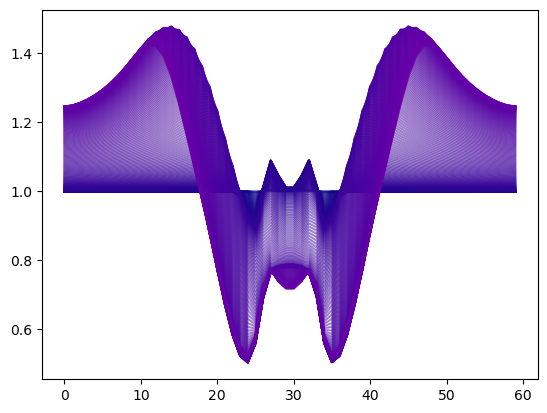

In [116]:
rho2 = data[:, 24, :, 1]
rho1 = data[:, 24, :, 0]
colors = plt.cm.plasma(np.linspace(0, 1, T*10))

fig, ax = plt.subplots()
for i in range(T*10):
    ax.plot(rho2[i]+rho1[i], '-', alpha=0.5, color=colors[i])

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.plasma, norm=plt.Normalize(vmin=0, vmax=T-1))
sm.set_array([])  # Only needed for older matplotlib versions
cbar = plt.colorbar(sm, ax=ax, label='Time step')

plt.title('rho')
plt.show()